In [11]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pid import *
import numpy as np
from math import isclose
#import apriltaghelper as at



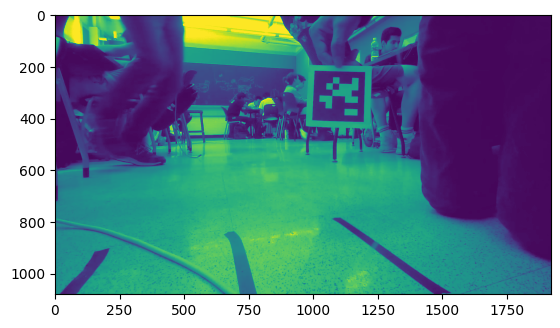

In [12]:

cap = cv2.VideoCapture('AprilTagTest.mkv')
ret, frame = cap.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)



In [13]:
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

Tag:  1
1012 228
(1080, 1920, 3)
percent: 7.11
percent: 20.68
Tag Coords: 
1096
316
960.0
540.0
(27.31359561670761, -44.66326470923073)


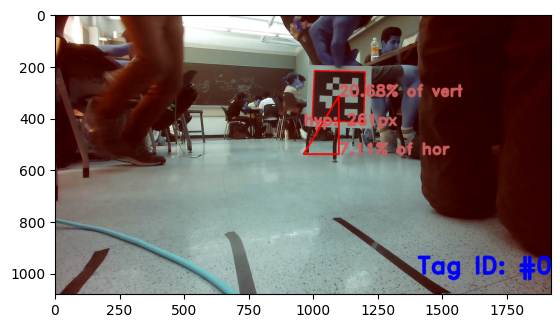

Tag:  1
1057 320
(1080, 1920, 3)
percent: 8.57
percent: 10.77
Tag Coords: 
1124
423
960.0
540.0
(32.92565208306282, -23.27158230340356)


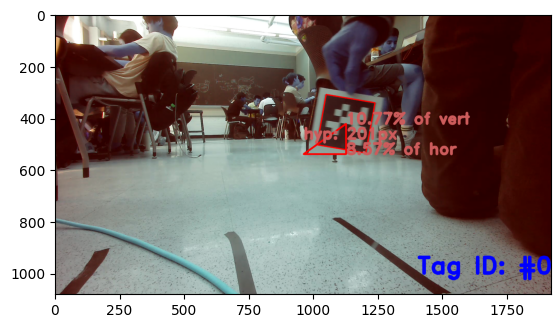

Tag:  1
794 164
(1080, 1920, 3)
percent: 6.2
percent: 27.38
Tag Coords: 
840
244
960.0
540.0
(-23.821369500860307, -59.14088735555054)


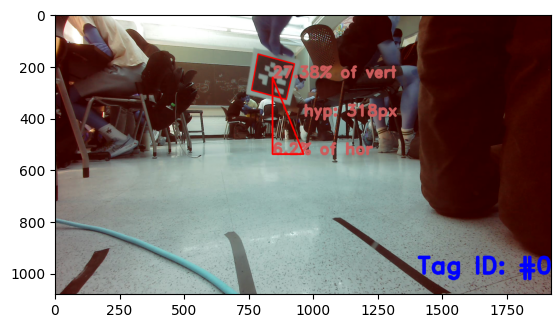

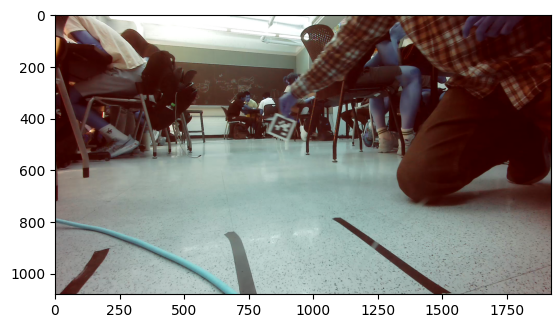

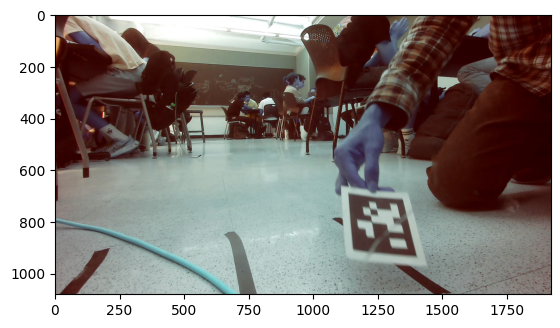

Tag:  1
1119 870
(1080, 1920, 3)
percent: 13.83
percent: 32.23
Tag Coords: 
1225
888
960.0
540.0
(53.09699860564888, 69.60653321444288)


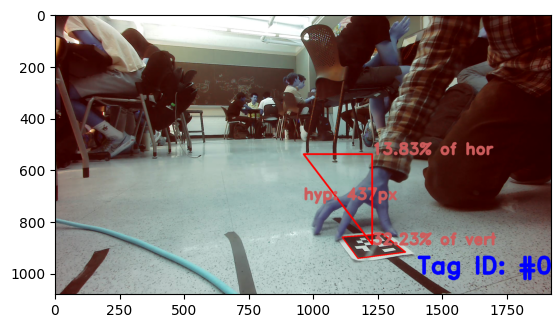

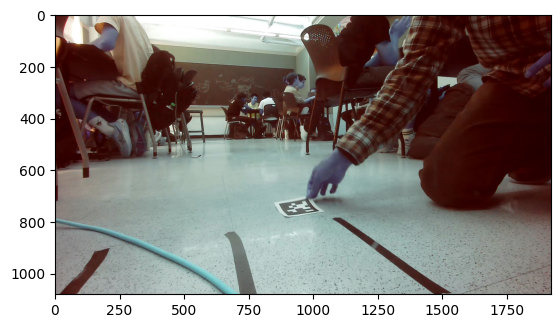

Tag:  1
491 454
(1080, 1920, 3)
percent: 19.26
percent: 1.41
Tag Coords: 
590
524
960.0
540.0
(-73.95361022816085, -3.043899961878947)


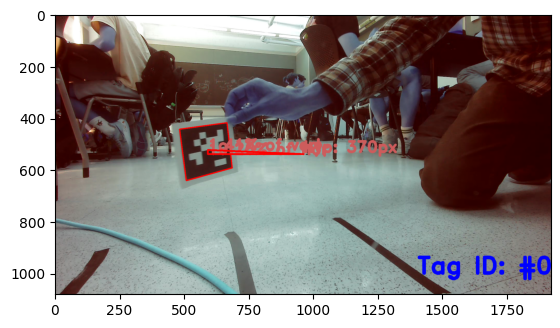

Tag:  1
1094 305
(1080, 1920, 3)
percent: 11.15
percent: 15.66
Tag Coords: 
1174
370
960.0
540.0
(42.83501387454581, -33.82484351903167)


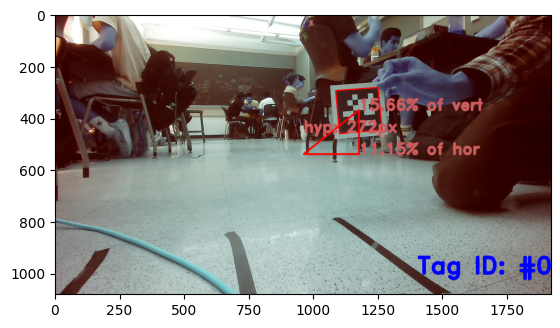

Final output:  (42.83501387454581, -33.82484351903167)


In [14]:
vcap = cv2.VideoCapture("AprilTagTest.mkv")
frequency = 100
count = 0

while True:
    ret, img = vcap.read()
    if not ret:
        try:
            print("Final output: ", (x_output, y_output))
            break
        except:
            print("PID was not activated")
            break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    if count % frequency == 0:
        #print(img.shape[0], img.shape[1]) #rows, columns
        at_detector = Detector(families='tag36h11',
                    nthreads=1,
                    quad_decimate=1.0,
                    quad_sigma=0.0,
                    refine_edges=1,
                    decode_sharpening=0.25,
                    debug=0)
        cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
        camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)
        color_img = img


        y_pid = PID(0.2, 0.0, 0.0, 100)
        x_pid = PID(0.2, 0.0, 0.0, 100)

        i=1
        for tag in tags:
            print("Tag: ", i)
            tag_x, tag_y = tag.center

            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (255, 0, 0), 3)

            cv2.putText(color_img, "Tag ID: #" + str(tag.tag_id),
                        org=(1400, 1000),
                        fontFace=cv2.FONT_HERSHEY_DUPLEX,
                        fontScale=3,
                        color=(0, 0, 255),
                        thickness =  10)
            i+=1
            #depth

            print(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10)

            
            rows, columns, channels = color_img.shape
            print(color_img.shape)
            horizontal_difference = 0
            vertical_difference = 0

            #horizontal (percentage)
            if tag.center[0] <= columns/2:
                horizontal_difference = tag.center[0] - columns/2
                p_horizontal_difference = horizontal_difference
                p_horizontal_difference = abs(np.round((horizontal_difference/(columns)) *  100, 2))
                cv2.putText(color_img, str(p_horizontal_difference) + "%" + " of hor",
                                    #org=(int(columns/2 - horizontal_difference/2 - 100), int(rows/2)),
                                    org=(int(tag_x), int(rows/2)),
                                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                                    fontScale=2,
                                    color=(205, 92, 92),
                                    thickness = 8)
            else:
                horizontal_difference = tag.center[0] - columns/2
                p_horizontal_difference = horizontal_difference
                p_horizontal_difference = abs(np.round((horizontal_difference/(columns)) *  100, 2))
                cv2.putText(color_img, str(p_horizontal_difference) + "%" + " of hor",
                                    #org=(int(columns/2 + horizontal_difference/2 + 100), int(rows/2)),
                                    org=(int(tag_x), int(rows/2)),
                                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                                    fontScale=2,
                                    color=(205, 92, 92),
                                    thickness = 8)

            

            print("percent: " + str(p_horizontal_difference))

            
            #cv2.line(color_img, (columns/2, rows/2), (columns/2) + horizontal_difference, rows/2), (255, 0, 0), 3)
        

            #vertical (percentage)
            if tag.center[0] <= rows/2:
                vertical_difference = rows/2 + tag.center[1]
                p_vertical_difference = vertical_difference
                p_vertical_difference = abs(np.round((vertical_difference/(rows)) *  100, 2))

                cv2.putText(color_img, str(p_vertical_difference) + "%" + " of vert",
                                        #org=(int(columns/2), int(rows/2 + vertical_difference/2 - 200)),
                                        org=(int(tag_x), int(tag_y)),
                                        fontFace=cv2.FONT_HERSHEY_DUPLEX,
                                        fontScale=2,
                                        color=(205, 92, 92),
                                        thickness = 8)
            else:
                vertical_difference = tag.center[1] - rows/2
                p_vertical_difference = vertical_difference
                p_vertical_difference = abs(np.round((vertical_difference/(rows)) *  100, 2))

                cv2.putText(color_img, str(p_vertical_difference) + "%" + " of vert",
                                        #org=(int(columns/2), int(rows/2 + vertical_difference/2 - 100)),
                                        org=(int(tag_x), int(tag_y)),
                                        fontFace=cv2.FONT_HERSHEY_DUPLEX,
                                        fontScale=2,
                                        color=(205, 92, 92),
                                        thickness = 8)
            

            print("percent: " + str(p_vertical_difference))
            
            #cv2.line(color_img, (columns/2, rows/2), (columns/2, rows/2 + vertical_difference), (255, 0, 0), 3)

            
            
            #hypotenuse (display pixel length)

            print("Tag Coords: ")
            print(str(int(tag_x)))
            print(str(int(tag_y)))
            print(columns/2)
            print(rows/2)

            cv2.line(color_img, tuple(map(int, tag.center)), tuple(map(int, np.array(img.shape[1::-1])/2)), (255, 0, 0), 6)


            hypotenuse = np.sqrt(pow((tag.center[0] - columns/2), 2) + pow((tag.center[1] - rows/2), 2))
            cv2.putText(color_img, "hyp: " + str(int(hypotenuse)) + "px",
                                    org=(int(columns/2), int((tag_y + rows/2)/2)),
                                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                                    fontScale=2,
                                    color=(205, 92, 92),
                                    thickness = 8)
            
            cv2.line(color_img, (int(columns/2), int(rows/2)), (int(tag_x), int(rows/2)), (255, 0, 0), 6)
            cv2.line(color_img, (int(tag_x), int(rows/2)), (int(tag_x), int(tag_y)), (255, 0, 0), 6)

            #displaced_x = tag.pose_t[0][0]
            displaced_x = tag.center[0] - (img.shape[1]/2)
            #print(displaced_x)
            #displaced_depth = tag.pose_t[1][0]
            displaced_y = tag.center[1] - (img.shape[0]/2)
            #print(displaced_y)

            x_output = 0
            y_output = 0

            #while(not isclose(x_output, tag.center[0]) and not isclose(y_output, tag.center[1])):
            displaced_x = tag.center[0] - (img.shape[1]/2)
            x_output = x_pid.update(displaced_x)
            displaced_y = tag.center[1] - (img.shape[0]/2)
            y_output = y_pid.update(displaced_y)
            print((x_output, y_output))


            
        plt.imshow(color_img)
        plt.show()

    count += 1

width = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'apriltags.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))


In [15]:
'''
cap = cv2.VideoCapture('AprilTagTest.mkv')
ret, frame = cap.read()

count=0
frequency=200
while ret:
    if count%frequency==count:
        at_detector = Detector(families='tag36h11',
                            nthreads=1,
                            quad_decimate=1.0,
                            quad_sigma=0.0,
                            refine_edges=1,
                            decode_sharpening=0.25,
                            debug=0)
        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)
        color_img = frame

        #mav = mavutil.mavlink_connection("udpin:0.0.0.0:14550")

        for tag in tags:
            center_x = sum(coord[0] for coord in tag.corners) / 4
            center_y = sum(coord[1] for coord in tag.corners) / 4
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 3)

            cv2.putText(color_img, str(tag.tag_id),
                        org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                        fontFace=cv2.FONT_HERSHEY_DUPLEX,
                        fontScale=5,
                        color=(0, 0, 255),
                        thickness =  10)
            
            (width, length) = np.shape(color_img)

            #depth
            depth_pid = pid.PID(32, 0.5, -1, 20)

            #heading
            heading_pid = pid.PID((25, .0, 5.0, 100))
            
            while True:
                # get pressure from the vehicle
                #msg = mav.recv_match(type="SCALED_PRESSURE", blocking=True)

                desired_depth = center_y
                current_depth = width/2

                print("Depth: ", current_depth)

                # calculate error
                error = desired_depth - current_depth
                print("Error: ", error)

                output = depth_pid.update(error)
                print("Output: ", output)

                # set vertical power
                #atd.set_vertical_power(mav, -output) 

                #-------------------------------------------------------------

                # # get yaw from the vehicle
                # msg = mav.recv_match(type="ATTITUDE", blocking=True)
                # yaw = msg.yaw
                # yaw_rate = msg.yawspeed

                # print("Heading: ", np.rad2deg(yaw))

                desired_lat  = center_x
                fixed_lat  = length/2

                # calculate error
                error = desired_lat - fixed_lat

                print("Error: ", error)


                output = pid.update(error)
                print("Output: ", output)

                # set lateral power
                #atd.set_lateral_power(mav, -output)

            
     
        #plt.imshow(color_img)
        #count+=1







    else:
        print(count)
        ret, frame = cap.read()
'''


'\ncap = cv2.VideoCapture(\'AprilTagTest.mkv\')\nret, frame = cap.read()\n\ncount=0\nfrequency=200\nwhile ret:\n    if count%frequency==count:\n        at_detector = Detector(families=\'tag36h11\',\n                            nthreads=1,\n                            quad_decimate=1.0,\n                            quad_sigma=0.0,\n                            refine_edges=1,\n                            decode_sharpening=0.25,\n                            debug=0)\n        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)\n        color_img = frame\n\n        #mav = mavutil.mavlink_connection("udpin:0.0.0.0:14550")\n\n        for tag in tags:\n            center_x = sum(coord[0] for coord in tag.corners) / 4\n            center_y = sum(coord[1] for coord in tag.corners) / 4\n            for idx in range(len(tag.corners)):\n                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 3)\n\n       